In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
    # Full path to the CSV
file_path = '/home/uwabor/Downloads/brasil-real-estate-1.csv'

# Read the file
df1 = pd.read_csv(file_path)
# View the first few rows
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"


In [3]:
# removing all NAN rows from DF1
df1 = df1.dropna()
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"


In [4]:
# Using the Lat-lon to create different columns

df1[["lat", "lon"]] = df1["lat-lon"].str.split(',', expand=True).astype(float)
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85",-9.644305,-35.708814
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37",-9.643093,-35.704840
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45",-9.622703,-35.729795
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20",-9.622837,-35.719556
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71",-9.654955,-35.700227


In [5]:
# create state column from place_with_parent_names
df1["state"] = df1["place_with_parent_names"].str.extract(r'\|Brasil\|([^|]+)')
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85",-9.644305,-35.708814,Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37",-9.643093,-35.704840,Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45",-9.622703,-35.729795,Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20",-9.622837,-35.719556,Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71",-9.654955,-35.700227,Alagoas


In [5]:
# converting all price_usd to floats by removing all strings and symbols
df1["price_usd"] = df1["price_usd"].astype(str) \
    .str.replace('$', '', regex=False) \
    .str.replace(',', '', regex=False) \
    .astype(float)
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,187230.85,-9.644305,-35.708814
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,81133.37,-9.643093,-35.704840
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,154465.45,-9.622703,-35.729795
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,146013.20,-9.622837,-35.719556
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,101416.71,-9.654955,-35.700227


In [6]:
# removing lat-lon and place-with-parent-names from the column
df1.drop(["lat-lon", "place_with_parent_names"], axis=1, inplace=True)
df1.head()

,property_type,region,area_m2,price_usd,lat,lon
0,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814
1,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840
2,house,Northeast,211.0,154465.45,-9.622703,-35.729795
3,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556
4,apartment,Northeast,55.0,101416.71,-9.654955,-35.700227


In [7]:
# Accessing the CSV file from Computer
file_path = '/home/uwabor/Downloads/brasil-real-estate-2.csv'

# Read the file
df2 = pd.read_csv(file_path)
# View the first few rows
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [8]:
exchange_rate = 3.19 # 1USD = 3.19 BRL

# create a new column "price_usd"
df2["price_usd"] = (df2["price_brl"] / [exchange_rate]).round(2)
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98,129850.46
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53,265958.79
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28,93867.80
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53,265958.79
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36,145495.10


In [9]:
df2.drop("price_brl", axis=1, inplace=True)
df2 = df2.dropna()
df2.head()

,property_type,state,region,lat,lon,area_m2,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.46
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.79
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.80
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.79
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.10


In [10]:
df = pd.concat([df1, df2])
print("df shape:", df.shape)
df.head()

df shape: (22844, 7)


,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814,NaN
1,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840,NaN
2,house,Northeast,211.0,154465.45,-9.622703,-35.729795,NaN
3,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556,NaN
4,apartment,Northeast,55.0,101416.71,-9.654955,-35.700227,NaN


In [11]:
# Statistical data summary
summary_stats = df[["area_m2", "price_usd"]].describe()
summary_stats.head(10)

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315515
std,47.742932,103617.682979
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.882500
max,252.000000,525659.720000


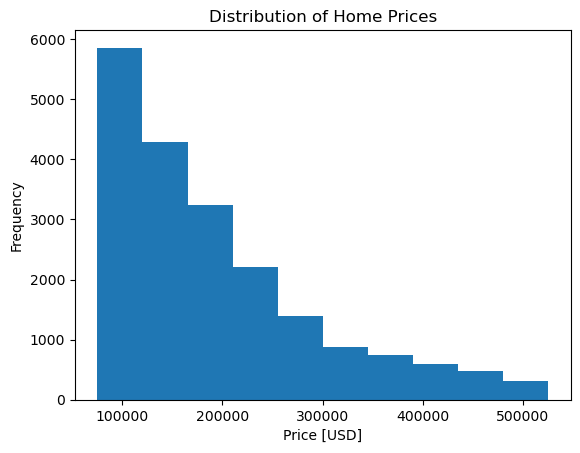

In [12]:

fig, ax = plt.subplots()

# Plot a histogram of the first 20,000 values in the "price_usd" column.
# This is the key part that creates the bell-shaped curve.
ax.hist(df["price_usd"][:20000])

# Set the x-axis label
ax.set_xlabel("Price [USD]")


# Set the y-axis label
ax.set_ylabel("Frequency")

# Set the title
ax.set_title("Distribution of Home Prices")

# Display the plot
plt.show()



Text(0.5, 1.0, 'Distribution of Home Sizes')

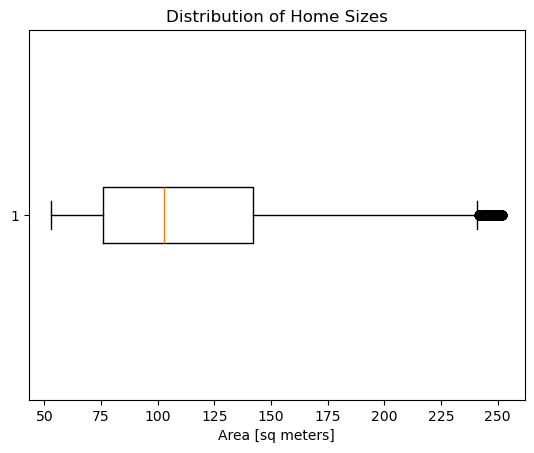

In [13]:

fig, ax = plt.subplots()

#Build box plot
ax.boxplot(df["area_m2"], vert=False)

# Label x-axis
ax.set_xlabel("Area [sq meters]")

# Add title
ax.set_title("Distribution of Home Sizes")

In [15]:
# Grouping them
mean_price_by_region = df.groupby("region")["price_usd"].mean().sort_values()
mean_price_by_region

region
Central-West    178596.283663
North           181308.958188
Northeast       185422.985482
South           189012.345360
Southeast       208996.762761
Name: price_usd, dtype: float64

<Axes: title={'center': 'Mean Home Price by Region'}, xlabel='Region', ylabel='Mean Price [USD]'>

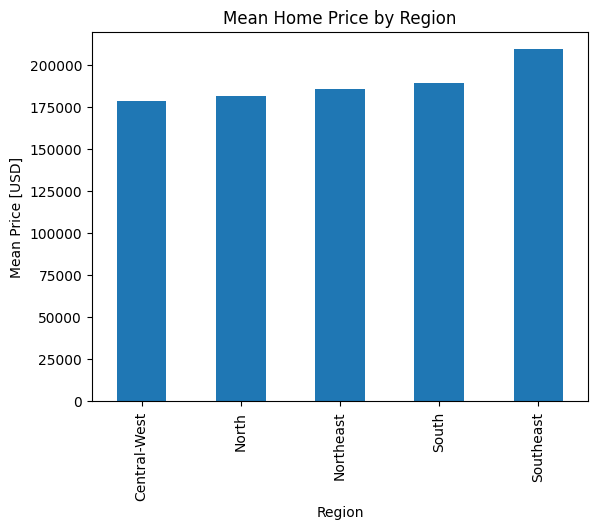

In [16]:

fig, ax = plt.subplots()

# Build bar chart, label axes, add title
mean_price_by_region.plot(
    kind="bar",
    ax=ax,
    xlabel="Region",
    ylabel="Mean Price [USD]",
    title="Mean Home Price by Region"
)

In [17]:
df_south = df[df["region"] == "South"]
df_south.head()


,property_type,region,area_m2,price_usd,lat,lon,state
9304,apartment,South,127.0,296448.85,-25.455704,-49.292918,Paraná
9305,apartment,South,104.0,219996.25,-25.455704,-49.292918,Paraná
9306,apartment,South,100.0,194210.50,-25.460236,-49.293812,Paraná
9307,apartment,South,77.0,149252.94,-25.460236,-49.293812,Paraná
9308,apartment,South,73.0,144167.75,-25.460236,-49.293812,Paraná


In [18]:
homes_by_state = df_south["state"].value_counts()
homes_by_state

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

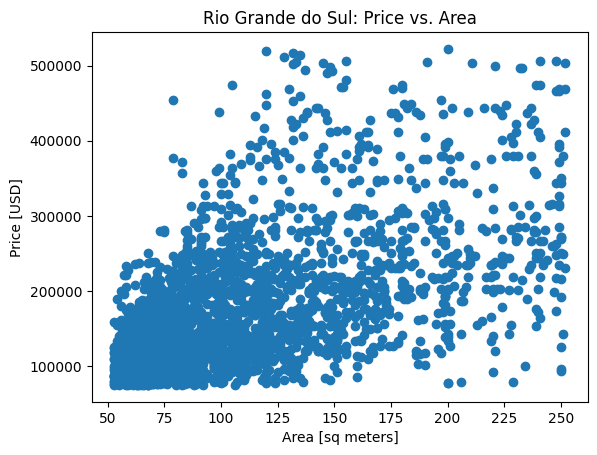

In [19]:
# Find the name of the state with the most properties
top_state = df_south["state"].value_counts().idxmax()

# Subset data to include only properties from that state
df_south_rgs = df_south[df_south["state"] == top_state]

# Don't change the code below 👇
fig, ax = plt.subplots()

# Build scatter plot
ax.scatter(x=df_south_rgs["area_m2"], y=df_south_rgs["price_usd"])

# Label axes
ax.set_xlabel("Area [sq meters]")
ax.set_ylabel("Price [USD]")

# Add title using the name of the top state
ax.set_title(f"{top_state}: Price vs. Area")

# Show the plot
plt.show()

In [20]:
# Create dictionary with states and their correlation coefficients
south_states_corr = {
    state: df_south[df_south["state"] == state]["area_m2"].corr(df_south[df_south["state"] == state]["price_usd"])
    for state in df_south["state"].unique()
}

# Display the final dictionary
south_states_corr

{'Paraná': 0.5436659935502661,
 'Rio Grande do Sul': 0.5773267433871903,
 'Santa Catarina': 0.5068121769989853}

In [ ]:
print("Hello Moto")